# Results for BERT when applying syn tranformation to both premise and hypothesis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML 

## Results for $\rho = 0$

In [2]:
df1 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df2 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv") # fake
df_rho_0 = pd.concat([df1, df2]).reset_index(drop=True)
display(HTML(df_rho_0.to_html()))

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,observable_t_stats,p_value,training_time,test_time,boot_t_1,boot_t_2,boot_t_3,boot_t_4,boot_t_5,boot_t_6,boot_t_7,boot_t_8,boot_t_9,boot_t_10,boot_t_11,boot_t_12,boot_t_13,boot_t_14,boot_t_15,boot_t_16,boot_t_17,boot_t_18,boot_t_19,boot_t_20,boot_t_21,boot_t_22,boot_t_23,boot_t_24,boot_t_25,boot_t_26,boot_t_27,boot_t_28,boot_t_29,boot_t_30,boot_t_31,boot_t_32,boot_t_33,boot_t_34,boot_t_35,boot_t_36,boot_t_37,boot_t_38,boot_t_39,boot_t_40,boot_t_41,boot_t_42,boot_t_43,boot_t_44,boot_t_45,boot_t_46,boot_t_47,boot_t_48,boot_t_49,boot_t_50,boot_t_51,boot_t_52,boot_t_53,boot_t_54,boot_t_55,boot_t_56,boot_t_57,boot_t_58,boot_t_59,boot_t_60,boot_t_61,boot_t_62,boot_t_63,boot_t_64,boot_t_65,boot_t_66,boot_t_67,boot_t_68,boot_t_69,boot_t_70,boot_t_71,boot_t_72,boot_t_73,boot_t_74,boot_t_75,boot_t_76,boot_t_77,boot_t_78,boot_t_79,boot_t_80,boot_t_81,boot_t_82,boot_t_83,boot_t_84,boot_t_85,boot_t_86,boot_t_87,boot_t_88,boot_t_89,boot_t_90,boot_t_91,boot_t_92,boot_t_93,boot_t_94,boot_t_95,boot_t_96,boot_t_97,boot_t_98,boot_t_99,boot_t_100,boot_t_101,boot_t_102,boot_t_103,boot_t_104,boot_t_105,boot_t_106,boot_t_107,boot_t_108,boot_t_109,boot_t_110,boot_t_111,boot_t_112,boot_t_113,boot_t_114,boot_t_115,boot_t_116,boot_t_117,boot_t_118,boot_t_119,boot_t_120,boot_t_121,boot_t_122,boot_t_123,boot_t_124,boot_t_125,boot_t_126,boot_t_127,boot_t_128,boot_t_129,boot_t_130,boot_t_131,boot_t_132,boot_t_133,boot_t_134,boot_t_135,boot_t_136,boot_t_137,boot_t_138,boot_t_139,boot_t_140,boot_t_141,boot_t_142,boot_t_143,boot_t_144,boot_t_145,boot_t_146,boot_t_147,boot_t_148,boot_t_149,boot_t_150,boot_t_151,boot_t_152,boot_t_153,boot_t_154,boot_t_155,boot_t_156,boot_t_157,boot_t_158,boot_t_159,boot_t_160,boot_t_161,boot_t_162,boot_t_163,boot_t_164,boot_t_165,boot_t_166,boot_t_167,boot_t_168,boot_t_169,boot_t_170,boot_t_171,boot_t_172,boot_t_173,boot_t_174,boot_t_175,boot_t_176,boot_t_177,boot_t_178,boot_t_179,boot_t_180,boot_t_181,boot_t_182,boot_t_183,boot_t_184,boot_t_185,boot_t_186,boot_t_187,boot_t_188,boot_t_189,boot_t_190,boot_t_191,boot_t_192,boot_t_193,boot_t_194,boot_t_195,boot_t_196,boot_t_197,boot_t_198,boot_t_199,boot_t_200,boot_t_201,boot_t_202,boot_t_203,boot_t_204,boot_t_205,boot_t_206,boot_t_207,boot_t_208,boot_t_209,boot_t_210,boot_t_211,boot_t_212,boot_t_213,boot_t_214,boot_t_215,boot_t_216,boot_t_217,boot_t_218,boot_t_219,boot_t_220,boot_t_221,boot_t_222,boot_t_223,boot_t_224,boot_t_225,boot_t_226,boot_t_227,boot_t_228,boot_t_229,boot_t_230,boot_t_231,boot_t_232,boot_t_233,boot_t_234,boot_t_235,boot_t_236,boot_t_237,boot_t_238,boot_t_239,boot_t_240,boot_t_241,boot_t_242,boot_t_243,boot_t_244,boot_t_245,boot_t_246,boot_t_247,boot_t_248,boot_t_249,boot_t_250,boot_t_251,boot_t_252,boot_t_253,boot_t_254,boot_t_255,boot_t_256,boot_t_257,boot_t_258,boot_t_259,boot_t_260,boot_t_261,boot_t_262,boot_t_263,boot_t_264,boot_t_265,boot_t_266,boot_t_267,boot_t_268,boot_t_269,boot_t_270,boot_t_271,boot_t_272,boot_t_273,boot_t_274,boot_t_275,boot_t_276,boot_t_277,boot_t_278,boot_t_279,boot_t_280,boot_t_281,boot_t_282,boot_t_283,boot_t_284,boot_t_285,boot_t_286,boot_t_287,boot_t_288,boot_t_289,boot_t_290,boot_t_291,boot_t_292,boot_t_293,boot_t_294,boot_t_295,boot_t_296,boot_t_297,boot_t_298,boot_t_299,boot_t_300,boot_t_301,boot_t_302,boot_t_303,boot_t_304,boot_t_305,boot_t_306,boot_t_307,boot_t_308,boot_t_309,boot_t_310,boot_t_311,boot_t_312,boot_t_313,boot_t_314,boot_t_315,boot_t_316,boot_t_317,boot_t_318,boot_t_319,boot_t_320,boot_t_321,boot_t_322,boot_t_323,boot_t_324,boot_t_325,boot_t_326,boot_t_327,boot_t_328,boot_t_329,boot_t_330,boot_t_331,boot_t_332,boot_t_333,boot_t_334,boot_t_335,boot_t_336,boot_t_337,boot_t_338,boot_t_339,boot_t_340,boot_t_341,boot_t_342,boot_t_343,boot_t_344,boot_t_345,boot_t_346,boot_t_347,boot_t_348,boot_t_349,boot_t_350,boot_t_351,boot_t_352,boot_t_353,boot_t_354,boot_t_355,boot_t_356,boot_t_357,boo

In [12]:
np.random.choice(range(300)), np.random.choice(range(50))

(109, 14)

## Results for $\rho = 0.25$

In [3]:
# fake

df1 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df2 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df_rho_0p25 = pd.concat([df1, df2]).reset_index(drop=True)
display(HTML(df_rho_0p25.to_html()))

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,observable_t_stats,p_value,training_time,test_time,boot_t_1,boot_t_2,boot_t_3,boot_t_4,boot_t_5,boot_t_6,boot_t_7,boot_t_8,boot_t_9,boot_t_10,boot_t_11,boot_t_12,boot_t_13,boot_t_14,boot_t_15,boot_t_16,boot_t_17,boot_t_18,boot_t_19,boot_t_20,boot_t_21,boot_t_22,boot_t_23,boot_t_24,boot_t_25,boot_t_26,boot_t_27,boot_t_28,boot_t_29,boot_t_30,boot_t_31,boot_t_32,boot_t_33,boot_t_34,boot_t_35,boot_t_36,boot_t_37,boot_t_38,boot_t_39,boot_t_40,boot_t_41,boot_t_42,boot_t_43,boot_t_44,boot_t_45,boot_t_46,boot_t_47,boot_t_48,boot_t_49,boot_t_50,boot_t_51,boot_t_52,boot_t_53,boot_t_54,boot_t_55,boot_t_56,boot_t_57,boot_t_58,boot_t_59,boot_t_60,boot_t_61,boot_t_62,boot_t_63,boot_t_64,boot_t_65,boot_t_66,boot_t_67,boot_t_68,boot_t_69,boot_t_70,boot_t_71,boot_t_72,boot_t_73,boot_t_74,boot_t_75,boot_t_76,boot_t_77,boot_t_78,boot_t_79,boot_t_80,boot_t_81,boot_t_82,boot_t_83,boot_t_84,boot_t_85,boot_t_86,boot_t_87,boot_t_88,boot_t_89,boot_t_90,boot_t_91,boot_t_92,boot_t_93,boot_t_94,boot_t_95,boot_t_96,boot_t_97,boot_t_98,boot_t_99,boot_t_100,boot_t_101,boot_t_102,boot_t_103,boot_t_104,boot_t_105,boot_t_106,boot_t_107,boot_t_108,boot_t_109,boot_t_110,boot_t_111,boot_t_112,boot_t_113,boot_t_114,boot_t_115,boot_t_116,boot_t_117,boot_t_118,boot_t_119,boot_t_120,boot_t_121,boot_t_122,boot_t_123,boot_t_124,boot_t_125,boot_t_126,boot_t_127,boot_t_128,boot_t_129,boot_t_130,boot_t_131,boot_t_132,boot_t_133,boot_t_134,boot_t_135,boot_t_136,boot_t_137,boot_t_138,boot_t_139,boot_t_140,boot_t_141,boot_t_142,boot_t_143,boot_t_144,boot_t_145,boot_t_146,boot_t_147,boot_t_148,boot_t_149,boot_t_150,boot_t_151,boot_t_152,boot_t_153,boot_t_154,boot_t_155,boot_t_156,boot_t_157,boot_t_158,boot_t_159,boot_t_160,boot_t_161,boot_t_162,boot_t_163,boot_t_164,boot_t_165,boot_t_166,boot_t_167,boot_t_168,boot_t_169,boot_t_170,boot_t_171,boot_t_172,boot_t_173,boot_t_174,boot_t_175,boot_t_176,boot_t_177,boot_t_178,boot_t_179,boot_t_180,boot_t_181,boot_t_182,boot_t_183,boot_t_184,boot_t_185,boot_t_186,boot_t_187,boot_t_188,boot_t_189,boot_t_190,boot_t_191,boot_t_192,boot_t_193,boot_t_194,boot_t_195,boot_t_196,boot_t_197,boot_t_198,boot_t_199,boot_t_200,boot_t_201,boot_t_202,boot_t_203,boot_t_204,boot_t_205,boot_t_206,boot_t_207,boot_t_208,boot_t_209,boot_t_210,boot_t_211,boot_t_212,boot_t_213,boot_t_214,boot_t_215,boot_t_216,boot_t_217,boot_t_218,boot_t_219,boot_t_220,boot_t_221,boot_t_222,boot_t_223,boot_t_224,boot_t_225,boot_t_226,boot_t_227,boot_t_228,boot_t_229,boot_t_230,boot_t_231,boot_t_232,boot_t_233,boot_t_234,boot_t_235,boot_t_236,boot_t_237,boot_t_238,boot_t_239,boot_t_240,boot_t_241,boot_t_242,boot_t_243,boot_t_244,boot_t_245,boot_t_246,boot_t_247,boot_t_248,boot_t_249,boot_t_250,boot_t_251,boot_t_252,boot_t_253,boot_t_254,boot_t_255,boot_t_256,boot_t_257,boot_t_258,boot_t_259,boot_t_260,boot_t_261,boot_t_262,boot_t_263,boot_t_264,boot_t_265,boot_t_266,boot_t_267,boot_t_268,boot_t_269,boot_t_270,boot_t_271,boot_t_272,boot_t_273,boot_t_274,boot_t_275,boot_t_276,boot_t_277,boot_t_278,boot_t_279,boot_t_280,boot_t_281,boot_t_282,boot_t_283,boot_t_284,boot_t_285,boot_t_286,boot_t_287,boot_t_288,boot_t_289,boot_t_290,boot_t_291,boot_t_292,boot_t_293,boot_t_294,boot_t_295,boot_t_296,boot_t_297,boot_t_298,boot_t_299,boot_t_300,boot_t_301,boot_t_302,boot_t_303,boot_t_304,boot_t_305,boot_t_306,boot_t_307,boot_t_308,boot_t_309,boot_t_310,boot_t_311,boot_t_312,boot_t_313,boot_t_314,boot_t_315,boot_t_316,boot_t_317,boot_t_318,boot_t_319,boot_t_320,boot_t_321,boot_t_322,boot_t_323,boot_t_324,boot_t_325,boot_t_326,boot_t_327,boot_t_328,boot_t_329,boot_t_330,boot_t_331,boot_t_332,boot_t_333,boot_t_334,boot_t_335,boot_t_336,boot_t_337,boot_t_338,boot_t_339,boot_t_340,boot_t_341,boot_t_342,boot_t_343,boot_t_344,boot_t_345,boot_t_346,boot_t_347,boot_t_348,boot_t_349,boot_t_350,boot_t_351,boot_t_352,boot_t_353,boot_t_354,boot_t_355,boot_t_356,boot_t_357,boo

## Results for $\rho = 0.5$

In [4]:
# fake

df1 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df2 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df_rho_0p5 = pd.concat([df1, df2]).reset_index(drop=True)
display(HTML(df_rho_0p5.to_html()))

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,observable_t_stats,p_value,training_time,test_time,boot_t_1,boot_t_2,boot_t_3,boot_t_4,boot_t_5,boot_t_6,boot_t_7,boot_t_8,boot_t_9,boot_t_10,boot_t_11,boot_t_12,boot_t_13,boot_t_14,boot_t_15,boot_t_16,boot_t_17,boot_t_18,boot_t_19,boot_t_20,boot_t_21,boot_t_22,boot_t_23,boot_t_24,boot_t_25,boot_t_26,boot_t_27,boot_t_28,boot_t_29,boot_t_30,boot_t_31,boot_t_32,boot_t_33,boot_t_34,boot_t_35,boot_t_36,boot_t_37,boot_t_38,boot_t_39,boot_t_40,boot_t_41,boot_t_42,boot_t_43,boot_t_44,boot_t_45,boot_t_46,boot_t_47,boot_t_48,boot_t_49,boot_t_50,boot_t_51,boot_t_52,boot_t_53,boot_t_54,boot_t_55,boot_t_56,boot_t_57,boot_t_58,boot_t_59,boot_t_60,boot_t_61,boot_t_62,boot_t_63,boot_t_64,boot_t_65,boot_t_66,boot_t_67,boot_t_68,boot_t_69,boot_t_70,boot_t_71,boot_t_72,boot_t_73,boot_t_74,boot_t_75,boot_t_76,boot_t_77,boot_t_78,boot_t_79,boot_t_80,boot_t_81,boot_t_82,boot_t_83,boot_t_84,boot_t_85,boot_t_86,boot_t_87,boot_t_88,boot_t_89,boot_t_90,boot_t_91,boot_t_92,boot_t_93,boot_t_94,boot_t_95,boot_t_96,boot_t_97,boot_t_98,boot_t_99,boot_t_100,boot_t_101,boot_t_102,boot_t_103,boot_t_104,boot_t_105,boot_t_106,boot_t_107,boot_t_108,boot_t_109,boot_t_110,boot_t_111,boot_t_112,boot_t_113,boot_t_114,boot_t_115,boot_t_116,boot_t_117,boot_t_118,boot_t_119,boot_t_120,boot_t_121,boot_t_122,boot_t_123,boot_t_124,boot_t_125,boot_t_126,boot_t_127,boot_t_128,boot_t_129,boot_t_130,boot_t_131,boot_t_132,boot_t_133,boot_t_134,boot_t_135,boot_t_136,boot_t_137,boot_t_138,boot_t_139,boot_t_140,boot_t_141,boot_t_142,boot_t_143,boot_t_144,boot_t_145,boot_t_146,boot_t_147,boot_t_148,boot_t_149,boot_t_150,boot_t_151,boot_t_152,boot_t_153,boot_t_154,boot_t_155,boot_t_156,boot_t_157,boot_t_158,boot_t_159,boot_t_160,boot_t_161,boot_t_162,boot_t_163,boot_t_164,boot_t_165,boot_t_166,boot_t_167,boot_t_168,boot_t_169,boot_t_170,boot_t_171,boot_t_172,boot_t_173,boot_t_174,boot_t_175,boot_t_176,boot_t_177,boot_t_178,boot_t_179,boot_t_180,boot_t_181,boot_t_182,boot_t_183,boot_t_184,boot_t_185,boot_t_186,boot_t_187,boot_t_188,boot_t_189,boot_t_190,boot_t_191,boot_t_192,boot_t_193,boot_t_194,boot_t_195,boot_t_196,boot_t_197,boot_t_198,boot_t_199,boot_t_200,boot_t_201,boot_t_202,boot_t_203,boot_t_204,boot_t_205,boot_t_206,boot_t_207,boot_t_208,boot_t_209,boot_t_210,boot_t_211,boot_t_212,boot_t_213,boot_t_214,boot_t_215,boot_t_216,boot_t_217,boot_t_218,boot_t_219,boot_t_220,boot_t_221,boot_t_222,boot_t_223,boot_t_224,boot_t_225,boot_t_226,boot_t_227,boot_t_228,boot_t_229,boot_t_230,boot_t_231,boot_t_232,boot_t_233,boot_t_234,boot_t_235,boot_t_236,boot_t_237,boot_t_238,boot_t_239,boot_t_240,boot_t_241,boot_t_242,boot_t_243,boot_t_244,boot_t_245,boot_t_246,boot_t_247,boot_t_248,boot_t_249,boot_t_250,boot_t_251,boot_t_252,boot_t_253,boot_t_254,boot_t_255,boot_t_256,boot_t_257,boot_t_258,boot_t_259,boot_t_260,boot_t_261,boot_t_262,boot_t_263,boot_t_264,boot_t_265,boot_t_266,boot_t_267,boot_t_268,boot_t_269,boot_t_270,boot_t_271,boot_t_272,boot_t_273,boot_t_274,boot_t_275,boot_t_276,boot_t_277,boot_t_278,boot_t_279,boot_t_280,boot_t_281,boot_t_282,boot_t_283,boot_t_284,boot_t_285,boot_t_286,boot_t_287,boot_t_288,boot_t_289,boot_t_290,boot_t_291,boot_t_292,boot_t_293,boot_t_294,boot_t_295,boot_t_296,boot_t_297,boot_t_298,boot_t_299,boot_t_300,boot_t_301,boot_t_302,boot_t_303,boot_t_304,boot_t_305,boot_t_306,boot_t_307,boot_t_308,boot_t_309,boot_t_310,boot_t_311,boot_t_312,boot_t_313,boot_t_314,boot_t_315,boot_t_316,boot_t_317,boot_t_318,boot_t_319,boot_t_320,boot_t_321,boot_t_322,boot_t_323,boot_t_324,boot_t_325,boot_t_326,boot_t_327,boot_t_328,boot_t_329,boot_t_330,boot_t_331,boot_t_332,boot_t_333,boot_t_334,boot_t_335,boot_t_336,boot_t_337,boot_t_338,boot_t_339,boot_t_340,boot_t_341,boot_t_342,boot_t_343,boot_t_344,boot_t_345,boot_t_346,boot_t_347,boot_t_348,boot_t_349,boot_t_350,boot_t_351,boot_t_352,boot_t_353,boot_t_354,boot_t_355,boot_t_356,boot_t_357,boo

## Results for $\rho = 0.75$

In [5]:
# fake

df1 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df2 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df_rho_0p75 = pd.concat([df1, df2]).reset_index(drop=True)
display(HTML(df_rho_0p75.to_html()))

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,observable_t_stats,p_value,training_time,test_time,boot_t_1,boot_t_2,boot_t_3,boot_t_4,boot_t_5,boot_t_6,boot_t_7,boot_t_8,boot_t_9,boot_t_10,boot_t_11,boot_t_12,boot_t_13,boot_t_14,boot_t_15,boot_t_16,boot_t_17,boot_t_18,boot_t_19,boot_t_20,boot_t_21,boot_t_22,boot_t_23,boot_t_24,boot_t_25,boot_t_26,boot_t_27,boot_t_28,boot_t_29,boot_t_30,boot_t_31,boot_t_32,boot_t_33,boot_t_34,boot_t_35,boot_t_36,boot_t_37,boot_t_38,boot_t_39,boot_t_40,boot_t_41,boot_t_42,boot_t_43,boot_t_44,boot_t_45,boot_t_46,boot_t_47,boot_t_48,boot_t_49,boot_t_50,boot_t_51,boot_t_52,boot_t_53,boot_t_54,boot_t_55,boot_t_56,boot_t_57,boot_t_58,boot_t_59,boot_t_60,boot_t_61,boot_t_62,boot_t_63,boot_t_64,boot_t_65,boot_t_66,boot_t_67,boot_t_68,boot_t_69,boot_t_70,boot_t_71,boot_t_72,boot_t_73,boot_t_74,boot_t_75,boot_t_76,boot_t_77,boot_t_78,boot_t_79,boot_t_80,boot_t_81,boot_t_82,boot_t_83,boot_t_84,boot_t_85,boot_t_86,boot_t_87,boot_t_88,boot_t_89,boot_t_90,boot_t_91,boot_t_92,boot_t_93,boot_t_94,boot_t_95,boot_t_96,boot_t_97,boot_t_98,boot_t_99,boot_t_100,boot_t_101,boot_t_102,boot_t_103,boot_t_104,boot_t_105,boot_t_106,boot_t_107,boot_t_108,boot_t_109,boot_t_110,boot_t_111,boot_t_112,boot_t_113,boot_t_114,boot_t_115,boot_t_116,boot_t_117,boot_t_118,boot_t_119,boot_t_120,boot_t_121,boot_t_122,boot_t_123,boot_t_124,boot_t_125,boot_t_126,boot_t_127,boot_t_128,boot_t_129,boot_t_130,boot_t_131,boot_t_132,boot_t_133,boot_t_134,boot_t_135,boot_t_136,boot_t_137,boot_t_138,boot_t_139,boot_t_140,boot_t_141,boot_t_142,boot_t_143,boot_t_144,boot_t_145,boot_t_146,boot_t_147,boot_t_148,boot_t_149,boot_t_150,boot_t_151,boot_t_152,boot_t_153,boot_t_154,boot_t_155,boot_t_156,boot_t_157,boot_t_158,boot_t_159,boot_t_160,boot_t_161,boot_t_162,boot_t_163,boot_t_164,boot_t_165,boot_t_166,boot_t_167,boot_t_168,boot_t_169,boot_t_170,boot_t_171,boot_t_172,boot_t_173,boot_t_174,boot_t_175,boot_t_176,boot_t_177,boot_t_178,boot_t_179,boot_t_180,boot_t_181,boot_t_182,boot_t_183,boot_t_184,boot_t_185,boot_t_186,boot_t_187,boot_t_188,boot_t_189,boot_t_190,boot_t_191,boot_t_192,boot_t_193,boot_t_194,boot_t_195,boot_t_196,boot_t_197,boot_t_198,boot_t_199,boot_t_200,boot_t_201,boot_t_202,boot_t_203,boot_t_204,boot_t_205,boot_t_206,boot_t_207,boot_t_208,boot_t_209,boot_t_210,boot_t_211,boot_t_212,boot_t_213,boot_t_214,boot_t_215,boot_t_216,boot_t_217,boot_t_218,boot_t_219,boot_t_220,boot_t_221,boot_t_222,boot_t_223,boot_t_224,boot_t_225,boot_t_226,boot_t_227,boot_t_228,boot_t_229,boot_t_230,boot_t_231,boot_t_232,boot_t_233,boot_t_234,boot_t_235,boot_t_236,boot_t_237,boot_t_238,boot_t_239,boot_t_240,boot_t_241,boot_t_242,boot_t_243,boot_t_244,boot_t_245,boot_t_246,boot_t_247,boot_t_248,boot_t_249,boot_t_250,boot_t_251,boot_t_252,boot_t_253,boot_t_254,boot_t_255,boot_t_256,boot_t_257,boot_t_258,boot_t_259,boot_t_260,boot_t_261,boot_t_262,boot_t_263,boot_t_264,boot_t_265,boot_t_266,boot_t_267,boot_t_268,boot_t_269,boot_t_270,boot_t_271,boot_t_272,boot_t_273,boot_t_274,boot_t_275,boot_t_276,boot_t_277,boot_t_278,boot_t_279,boot_t_280,boot_t_281,boot_t_282,boot_t_283,boot_t_284,boot_t_285,boot_t_286,boot_t_287,boot_t_288,boot_t_289,boot_t_290,boot_t_291,boot_t_292,boot_t_293,boot_t_294,boot_t_295,boot_t_296,boot_t_297,boot_t_298,boot_t_299,boot_t_300,boot_t_301,boot_t_302,boot_t_303,boot_t_304,boot_t_305,boot_t_306,boot_t_307,boot_t_308,boot_t_309,boot_t_310,boot_t_311,boot_t_312,boot_t_313,boot_t_314,boot_t_315,boot_t_316,boot_t_317,boot_t_318,boot_t_319,boot_t_320,boot_t_321,boot_t_322,boot_t_323,boot_t_324,boot_t_325,boot_t_326,boot_t_327,boot_t_328,boot_t_329,boot_t_330,boot_t_331,boot_t_332,boot_t_333,boot_t_334,boot_t_335,boot_t_336,boot_t_337,boot_t_338,boot_t_339,boot_t_340,boot_t_341,boot_t_342,boot_t_343,boot_t_344,boot_t_345,boot_t_346,boot_t_347,boot_t_348,boot_t_349,boot_t_350,boot_t_351,boot_t_352,boot_t_353,boot_t_354,boot_t_355,boot_t_356,boot_t_357,boo

## Results for $\rho = 1.0$

In [6]:
# fake

df1 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df2 = pd.read_csv("results/snli/bert/sin_p_h/rho_0p0_dgp_seed_12_random_state_52.csv")
df_rho_0p1 = pd.concat([df1, df2]).reset_index(drop=True)
display(HTML(df_rho_0p1.to_html()))

,data,model,transformation,rho,dgp_seed,random_state,number_of_simulations,validation_accuracy,transformed_validation_accuracy,observable_t_stats,p_value,training_time,test_time,boot_t_1,boot_t_2,boot_t_3,boot_t_4,boot_t_5,boot_t_6,boot_t_7,boot_t_8,boot_t_9,boot_t_10,boot_t_11,boot_t_12,boot_t_13,boot_t_14,boot_t_15,boot_t_16,boot_t_17,boot_t_18,boot_t_19,boot_t_20,boot_t_21,boot_t_22,boot_t_23,boot_t_24,boot_t_25,boot_t_26,boot_t_27,boot_t_28,boot_t_29,boot_t_30,boot_t_31,boot_t_32,boot_t_33,boot_t_34,boot_t_35,boot_t_36,boot_t_37,boot_t_38,boot_t_39,boot_t_40,boot_t_41,boot_t_42,boot_t_43,boot_t_44,boot_t_45,boot_t_46,boot_t_47,boot_t_48,boot_t_49,boot_t_50,boot_t_51,boot_t_52,boot_t_53,boot_t_54,boot_t_55,boot_t_56,boot_t_57,boot_t_58,boot_t_59,boot_t_60,boot_t_61,boot_t_62,boot_t_63,boot_t_64,boot_t_65,boot_t_66,boot_t_67,boot_t_68,boot_t_69,boot_t_70,boot_t_71,boot_t_72,boot_t_73,boot_t_74,boot_t_75,boot_t_76,boot_t_77,boot_t_78,boot_t_79,boot_t_80,boot_t_81,boot_t_82,boot_t_83,boot_t_84,boot_t_85,boot_t_86,boot_t_87,boot_t_88,boot_t_89,boot_t_90,boot_t_91,boot_t_92,boot_t_93,boot_t_94,boot_t_95,boot_t_96,boot_t_97,boot_t_98,boot_t_99,boot_t_100,boot_t_101,boot_t_102,boot_t_103,boot_t_104,boot_t_105,boot_t_106,boot_t_107,boot_t_108,boot_t_109,boot_t_110,boot_t_111,boot_t_112,boot_t_113,boot_t_114,boot_t_115,boot_t_116,boot_t_117,boot_t_118,boot_t_119,boot_t_120,boot_t_121,boot_t_122,boot_t_123,boot_t_124,boot_t_125,boot_t_126,boot_t_127,boot_t_128,boot_t_129,boot_t_130,boot_t_131,boot_t_132,boot_t_133,boot_t_134,boot_t_135,boot_t_136,boot_t_137,boot_t_138,boot_t_139,boot_t_140,boot_t_141,boot_t_142,boot_t_143,boot_t_144,boot_t_145,boot_t_146,boot_t_147,boot_t_148,boot_t_149,boot_t_150,boot_t_151,boot_t_152,boot_t_153,boot_t_154,boot_t_155,boot_t_156,boot_t_157,boot_t_158,boot_t_159,boot_t_160,boot_t_161,boot_t_162,boot_t_163,boot_t_164,boot_t_165,boot_t_166,boot_t_167,boot_t_168,boot_t_169,boot_t_170,boot_t_171,boot_t_172,boot_t_173,boot_t_174,boot_t_175,boot_t_176,boot_t_177,boot_t_178,boot_t_179,boot_t_180,boot_t_181,boot_t_182,boot_t_183,boot_t_184,boot_t_185,boot_t_186,boot_t_187,boot_t_188,boot_t_189,boot_t_190,boot_t_191,boot_t_192,boot_t_193,boot_t_194,boot_t_195,boot_t_196,boot_t_197,boot_t_198,boot_t_199,boot_t_200,boot_t_201,boot_t_202,boot_t_203,boot_t_204,boot_t_205,boot_t_206,boot_t_207,boot_t_208,boot_t_209,boot_t_210,boot_t_211,boot_t_212,boot_t_213,boot_t_214,boot_t_215,boot_t_216,boot_t_217,boot_t_218,boot_t_219,boot_t_220,boot_t_221,boot_t_222,boot_t_223,boot_t_224,boot_t_225,boot_t_226,boot_t_227,boot_t_228,boot_t_229,boot_t_230,boot_t_231,boot_t_232,boot_t_233,boot_t_234,boot_t_235,boot_t_236,boot_t_237,boot_t_238,boot_t_239,boot_t_240,boot_t_241,boot_t_242,boot_t_243,boot_t_244,boot_t_245,boot_t_246,boot_t_247,boot_t_248,boot_t_249,boot_t_250,boot_t_251,boot_t_252,boot_t_253,boot_t_254,boot_t_255,boot_t_256,boot_t_257,boot_t_258,boot_t_259,boot_t_260,boot_t_261,boot_t_262,boot_t_263,boot_t_264,boot_t_265,boot_t_266,boot_t_267,boot_t_268,boot_t_269,boot_t_270,boot_t_271,boot_t_272,boot_t_273,boot_t_274,boot_t_275,boot_t_276,boot_t_277,boot_t_278,boot_t_279,boot_t_280,boot_t_281,boot_t_282,boot_t_283,boot_t_284,boot_t_285,boot_t_286,boot_t_287,boot_t_288,boot_t_289,boot_t_290,boot_t_291,boot_t_292,boot_t_293,boot_t_294,boot_t_295,boot_t_296,boot_t_297,boot_t_298,boot_t_299,boot_t_300,boot_t_301,boot_t_302,boot_t_303,boot_t_304,boot_t_305,boot_t_306,boot_t_307,boot_t_308,boot_t_309,boot_t_310,boot_t_311,boot_t_312,boot_t_313,boot_t_314,boot_t_315,boot_t_316,boot_t_317,boot_t_318,boot_t_319,boot_t_320,boot_t_321,boot_t_322,boot_t_323,boot_t_324,boot_t_325,boot_t_326,boot_t_327,boot_t_328,boot_t_329,boot_t_330,boot_t_331,boot_t_332,boot_t_333,boot_t_334,boot_t_335,boot_t_336,boot_t_337,boot_t_338,boot_t_339,boot_t_340,boot_t_341,boot_t_342,boot_t_343,boot_t_344,boot_t_345,boot_t_346,boot_t_347,boot_t_348,boot_t_349,boot_t_350,boot_t_351,boot_t_352,boot_t_353,boot_t_354,boot_t_355,boot_t_356,boot_t_357,boo

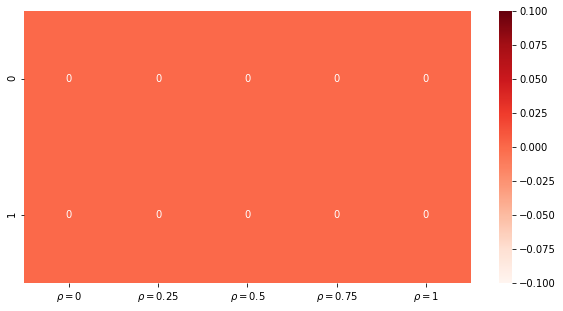

In [7]:
dfs = [df_rho_0, df_rho_0p25, df_rho_0p5, df_rho_0p75, df_rho_0p1]
names = [r"$\rho = 0$", r"$\rho = 0.25$", r"$\rho = 0.5$", r"$\rho = 0.75$", r"$\rho = 1$"]

all_p_values = {}
for df, name in zip(dfs, names):
    results = df.p_value
    all_p_values[name] = results 

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(all_p_values), annot=True, cmap="Reds", ax=ax);


